In [1]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Mostrar as primeiras linhas para confirmar o carregamento
vinhos.head()


,classe,alcool,acido_malico,cinzas,alcalinidade_de_cinzas,magnesio,fenois_totais,flavanoides,fenois_nao_flavanoides,proantocianinas,intensidade_de_cor,matiz,od280_od315_de_vinhos_diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# Separar features (X) e target (y)
X = vinhos.drop('classe', axis=1)
y = vinhos['classe']

# Divisão dos dados com random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirmar os tamanhos das divisões
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (124, 13)
Tamanho do conjunto de teste: (54, 13)


In [3]:
# Modelo com k=3
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_train, y_train)
y_pred_k3 = knn_k3.predict(X_test)
accuracy_k3 = accuracy_score(y_test, y_pred_k3)
print(f"Acurácia com k=3: {accuracy_k3:.2f}")

# Modelo com k=5
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Acurácia com k=5: {accuracy_k5:.2f}")


Acurácia com k=3: 0.74
Acurácia com k=5: 0.74


In [4]:
def avaliar_knn(random_state):
    # Divisão dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Modelo com k=3
    knn_k3 = KNeighborsClassifier(n_neighbors=3)
    knn_k3.fit(X_train, y_train)
    accuracy_k3 = accuracy_score(y_test, knn_k3.predict(X_test))

    # Modelo com k=5
    knn_k5 = KNeighborsClassifier(n_neighbors=5)
    knn_k5.fit(X_train, y_train)
    accuracy_k5 = accuracy_score(y_test, knn_k5.predict(X_test))

    print(f"Random State: {random_state} | Acurácia com k=3: {accuracy_k3:.2f} | Acurácia com k=5: {accuracy_k5:.2f}")
    return random_state, accuracy_k3, accuracy_k5

# Avaliar para random_state = 42, 17, 24
resultados = [avaliar_knn(rs) for rs in [42, 17, 24]]


Random State: 42 | Acurácia com k=3: 0.74 | Acurácia com k=5: 0.74
Random State: 17 | Acurácia com k=3: 0.65 | Acurácia com k=5: 0.67
Random State: 24 | Acurácia com k=3: 0.74 | Acurácia com k=5: 0.67


In [5]:
import pandas as pd

# Criar DataFrame com os resultados
resultados_df = pd.DataFrame(resultados, columns=['Random State', 'Acurácia k=3', 'Acurácia k=5'])

# Mostrar os resultados
print(resultados_df)

# Identificar o melhor desempenho
melhor_resultado = resultados_df.loc[resultados_df[['Acurácia k=3', 'Acurácia k=5']].max(axis=1).idxmax()]
print("\nMelhor configuração:")
print(melhor_resultado)


   Random State  Acurácia k=3  Acurácia k=5
0            42      0.740741      0.740741
1            17      0.648148      0.666667
2            24      0.740741      0.666667

Melhor configuração:
Random State    42.000000
Acurácia k=3     0.740741
Acurácia k=5     0.740741
Name: 0, dtype: float64


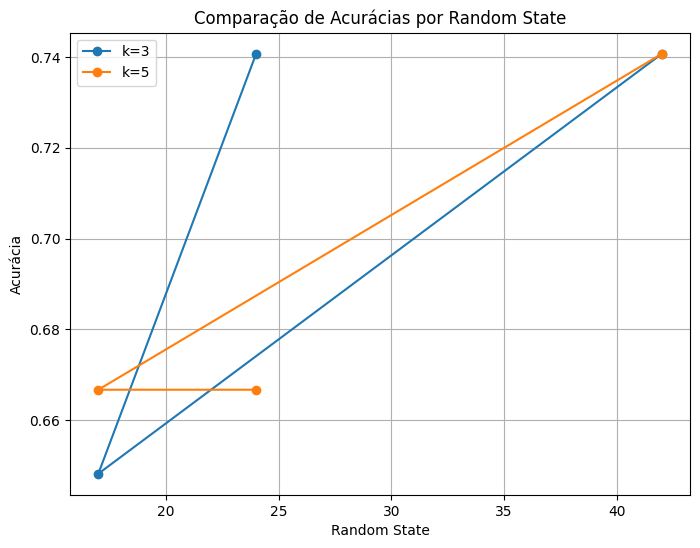

In [6]:
import matplotlib.pyplot as plt

# Gráfico de comparação de acurácias
plt.figure(figsize=(8, 6))
plt.plot(resultados_df['Random State'], resultados_df['Acurácia k=3'], marker='o', label='k=3')
plt.plot(resultados_df['Random State'], resultados_df['Acurácia k=5'], marker='o', label='k=5')
plt.title('Comparação de Acurácias por Random State')
plt.xlabel('Random State')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()
